Linear Discriminant Analysis (LDA)
===================================

This code performs Linear Discriminant Analysis (LDA) to classify data points based on two features, GPA and GMAT, using a binary target variable (De/Admit), which indicates admission status.<br>
Let’s break it down step by step:

## Setup

   - The code starts by importing necessary libraries (sklearn, pandas, numpy, matplotlib, seaborn)

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # python library to perform LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # library for confusion matrix
import pandas as pd # library for data manipulation
import numpy as np # library for numerical operations
import matplotlib.pyplot as plt # library for plotting
import seaborn as sns # library for plotting

## Read the Data files 


   - Loads two datasets: 
    
     - `admission2_mod.csv` (training data)
     
     - `hold_out_sample.csv` (test data)
     
   - The target variable 'De' is converted to boolean (True for 'admit', False otherwise)

In [2]:
df = pd.read_csv('admission2_mod.csv') # read the in-sample (training data) csv file into a pandas dataframe
df['De']=df['De']=='admit' # converting the admit status into boolean

out_of_sample = pd.read_csv('hold_out_sample.csv') # read the out-of-sample (test data) csv file into a pandas dataframe

In [3]:
print(df.head()) # print the first 5 rows of the dataframe
print(out_of_sample.head()) # print the first 5 rows of the out-of-sample dataframe

    GPA  GMAT     De
0  2.13   408  False
1  2.19   411  False
2  2.20   474  False
3  2.31   505  False
4  2.35   321  False
    GPA  GMAT  admit
0  2.96   596   True
1  3.14   473  False
2  3.22   482   True
3  3.29   527   True
4  3.69   505   True


## If you want to normalize your data (if needed)

In [4]:
#  from sklearn.preprocessing import StandardScaler # library for standardization

#  scaler = StandardScaler()
#  df[['GPA', 'GMAT']] = scaler.fit_transform(df[['GPA', 'GMAT']])
#  out_of_sample[['GPA', 'GMAT']] = scaler.transform(out_of_sample[['GPA', 'GMAT']])

## Plot the initial data
Visualize the relationship between GPA and GMAT scores, while marking points by admission status (De). 

   - Create a scatter plot showing GPA vs GMAT scores
   
   - Points are colored based on admission status
   
   - This helps visualize how the two groups (admitted/not admitted) are distributed

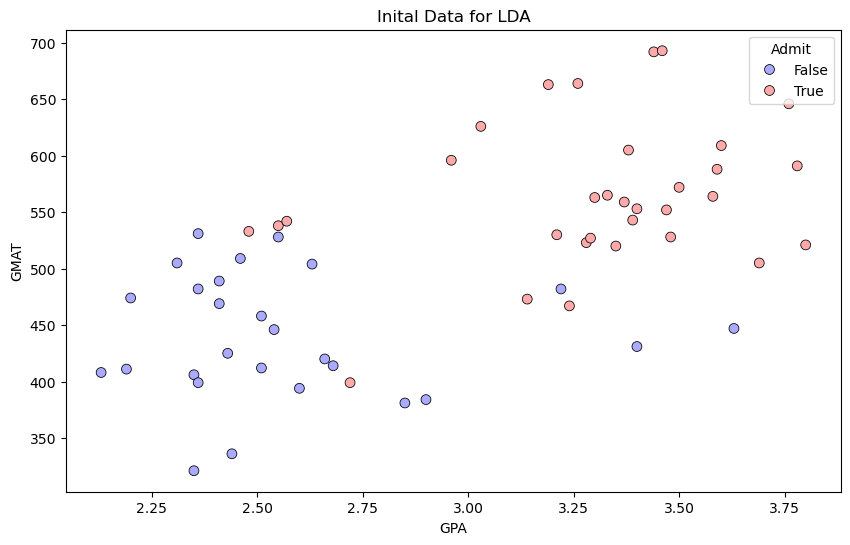

In [5]:
# Initial Data Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='GPA', y='GMAT', hue='De', palette='bwr', data=df, marker='o',s=50, edgecolor='k')
plt.legend(title='Admit')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('Inital Data for LDA')
plt.show()

## LDA Model Estimation
Fit an LDA model to predict De (admission status) using GPA and GMAT.

In [6]:
# 2. Fit LDA model
#Fits an LDA model using GPA and GMAT as features to predict admission status
# LDA tries to find a linear combination of features that best separates the two classes
lda = LDA()
X_train = df[['GPA', 'GMAT']]
y_train = df['De']
lda.fit(X_train, y_train)

# Print LDA model details (coefficients and means)
print("Coefficients of Linear Discriminants:", lda.coef_)
print("Group Means:", lda.means_)

Coefficients of Linear Discriminants: [[5.17081923 0.02943332]]
Group Means: [[  2.57185185 439.48148148]
 [  3.2996875  564.0625    ]]


## Plot the histogram of discriminant scores

   
   - Plots a histogram of LDA scores for both classes
   
   - Shows how well the LDA model separates the two groups
   
   - Overlapping areas indicate where misclassifications might occur

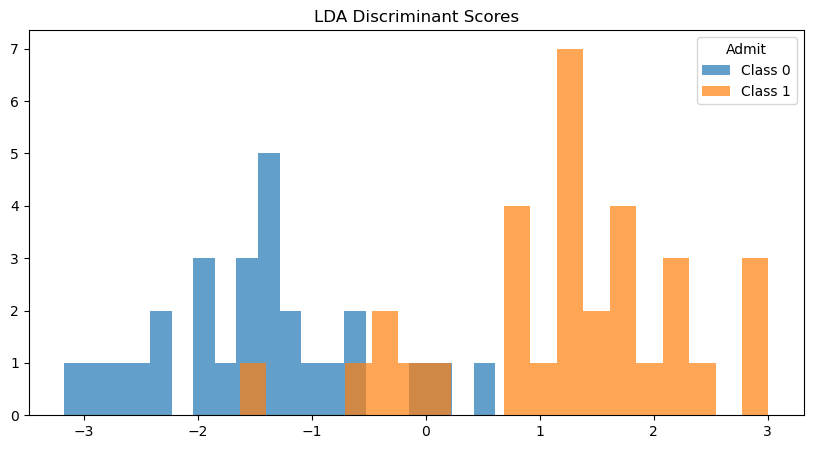

In [7]:
# 3. Plot group histogram of discriminant scores
lda_scores = lda.transform(X_train)
plt.figure(figsize=(10, 5))
plt.hist(lda_scores[y_train == 0], bins=20, alpha=0.7, label='Class 0')
plt.hist(lda_scores[y_train == 1], bins=20, alpha=0.7, label='Class 1')
plt.legend(title='Admit')
plt.title('LDA Discriminant Scores')
plt.show()


## LDA In-Sample Prediction

   - Makes predictions on the training data
   
   - Visualizes these predictions in a scatter plot
   

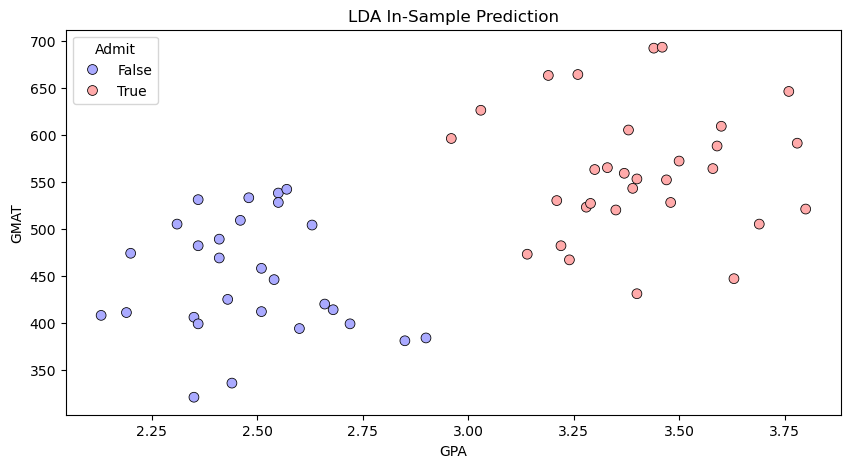

In [8]:
# 4. In-sample prediction
y_pred_train = lda.predict(X_train)

# Plot predictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x='GPA', y='GMAT', hue=y_pred_train, palette='bwr', data=df, s=50, edgecolor='k')
plt.legend(title='Admit')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('LDA In-Sample Prediction')
plt.show()

## Confusion Matrix In-Sample Prediction

   - Creates a confusion matrix to show prediction accuracy:
   
     - True Positives/Negatives (correct predictions)
     
     - False Positives/Negatives (incorrect predictions)

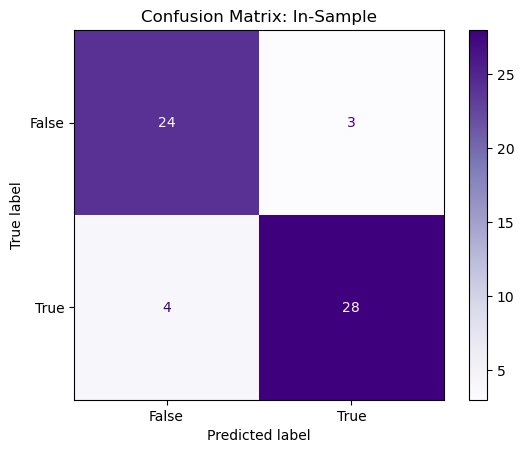

In [9]:
# Confusion Matrix for in-sample prediction
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=lda.classes_)
disp_train.plot(cmap='Purples')
plt.title("Confusion Matrix: In-Sample")
plt.show()

## Out-of-sample Prediction

   - Tests the model on the hold-out sample (test data)
   
   - Creates similar visualizations for the test predictions

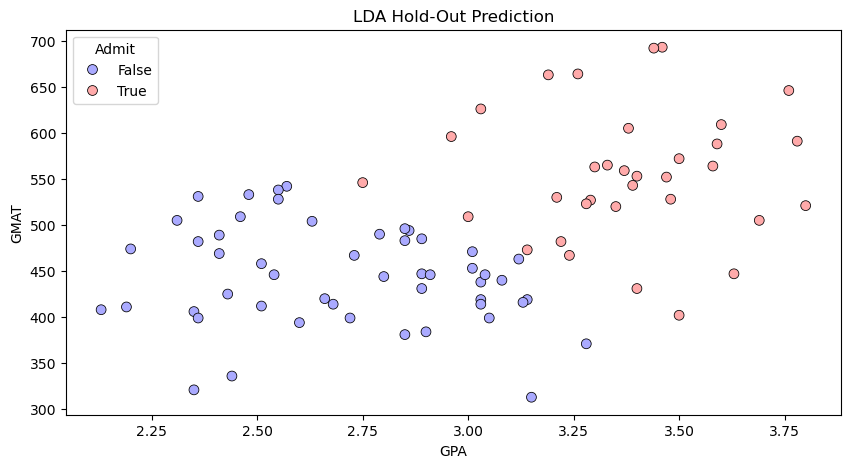

In [10]:
# 5. Out-of-sample prediction
X_test = out_of_sample[['GPA', 'GMAT']]
y_test = out_of_sample['admit']
y_pred_test = lda.predict(X_test)

# Plot out-of-sample predictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x='GPA', y='GMAT', data=out_of_sample, hue=y_pred_test, palette='bwr', edgecolor='k', s=50)
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.legend(title='Admit')
plt.title('LDA Hold-Out Prediction')
plt.show()

## Confusion Matrix for out-of-sample prediction

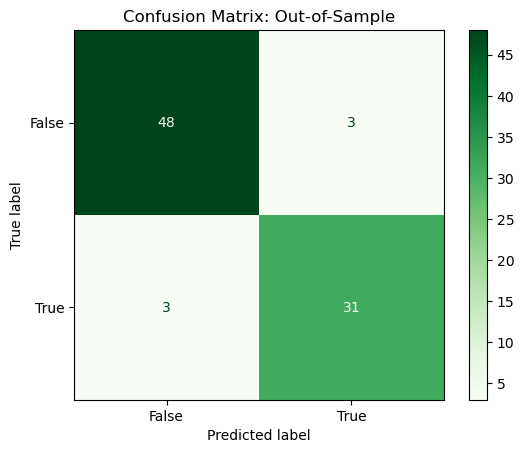

In [11]:
# Confusion Matrix for out-of-sample prediction
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lda.classes_)
disp_test.plot(cmap='Greens')
plt.title("Confusion Matrix: Out-of-Sample")
plt.show()